In [1]:
import openpyxl as pyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import string
import copy

In [2]:
ODwb = pyxl.load_workbook("OD600.xlsx")
REDwb = pyxl.load_workbook("mCherryFluor.xlsx")
YELLOWwb = pyxl.load_workbook("YFPFluor.xlsx")

In [3]:
ODsheet = ODwb[ODwb.get_sheet_names()[0]]
REDsheet = REDwb[REDwb.get_sheet_names()[0]]
YELLOWsheet = YELLOWwb[YELLOWwb.get_sheet_names()[0]]

In [4]:
samples = {}
n_time = 55
for letter in ['A', 'B', 'C', 'D', 'E', 'F']:
    for i in [1,2,3,4,5,6,7,8]:
        well = letter + str(i)
        samples[well]={'OD': np.zeros(n_time), 'Red': np.zeros(n_time), 'Yellow': np.zeros(n_time)}

In [5]:
xl_data_columns = (list(string.ascii_uppercase[2:26])+
                  list('A'+letter for letter in string.ascii_uppercase[0:24]))

In [6]:
def transfer_data(sheet, columns, dictionary, meas):
    for col in columns:
        letter = sheet[col+str(1)].value
        number = sheet[col+str(2)].value
        ref = letter + str(number)
        index = 0
        for i in range(4,59):
            dictionary[ref][meas][index]=sheet[col+str(i)].value
            index = index+1
    return

In [12]:
transfer_data(ODsheet,xl_data_columns, samples, 'OD')
transfer_data(REDsheet, xl_data_columns, samples, 'Red')
transfer_data(YELLOWsheet, xl_data_columns, samples, 'Yellow')

In [13]:
samples_bgsub = copy.deepcopy(samples)

In [14]:
for key, item in samples_bgsub.items():
    item['OD'] = item['OD'] - .99*np.min(item['OD'])
    item['Red'] = item['Red'] - .99*np.min(item['Red'])
    item['Yellow'] = item['Yellow'] - .99*np.min(item['Yellow'])

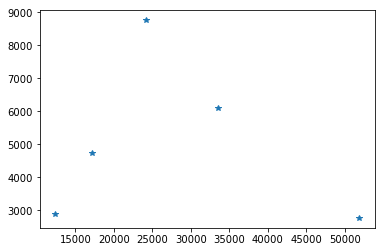

In [49]:
well = 'C2'
plt.plot(samples_bgsub[well]['Yellow'][17:22],samples_bgsub[well]['Red'][17:22],'*')

In [50]:
samples_bgsub['F8']['Yellow']

array([  1.81760000e+02,   1.20276000e+03,   1.52276000e+03,
         4.50760000e+02,   8.10760000e+02,   4.76776000e+03,
         3.84776000e+03,   1.33076000e+03,   3.73576000e+03,
         3.94276000e+03,   1.83976000e+03,   4.84576000e+03,
         4.93176000e+03,   4.07176000e+03,   5.44176000e+03,
         7.29176000e+03,   5.25176000e+03,   5.26976000e+03,
         6.41876000e+03,   8.88376000e+03,   9.93876000e+03,
         1.59917600e+04,   1.79397600e+04,   2.36167600e+04,
         3.33987600e+04,   4.00257600e+04,   4.93367600e+04,
         5.55627600e+04,   6.30737600e+04,   8.25587600e+04,
         1.01092760e+05,   1.35570760e+05,   1.67289760e+05,
         2.02191760e+05,   2.42005760e+05,   2.42005760e+05,
         2.42005760e+05,   2.42005760e+05,   2.42005760e+05,
         2.42005760e+05,   2.42005760e+05,   2.42005760e+05,
         2.42005760e+05,   2.42005760e+05,   2.42005760e+05,
         2.42005760e+05,   2.42005760e+05,   2.42005760e+05,
         2.42005760e+05,

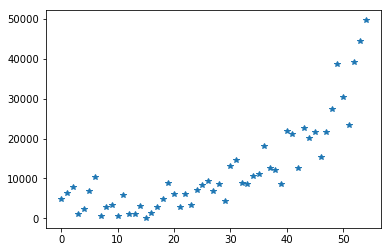

In [51]:
plt.plot(samples_bgsub['C2']['Red'],'*')

In [52]:
from scipy.optimize import curve_fit

In [53]:
def exp (x, a, b, c):
    return a*np.exp(b*x)+c

In [54]:
x = np.arange(23)*.333
y = samples_bgsub['B2']['OD'][0:23]

In [55]:
popt, pcov = curve_fit(exp, x, y)

In [56]:
popt

array([  1.77908766e-04,   1.22947953e+00,   1.07182350e-01])

In [57]:
z=np.arange(22)*.333
w=samples_bgsub['B2']['OD'][0:22]

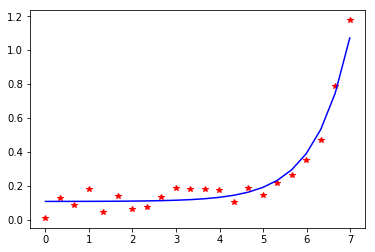

In [61]:
plt.plot(z,w,'r*')
plt.plot(z,exp(np.array(z),*popt),'b-')

In [59]:
np.log(2)/1.23

0.56353429313816694

In [60]:
exp(3,*popt)

0.11429556360761424